<a href="https://colab.research.google.com/github/Evgeniya363/Python/blob/main/Lesson10%5CTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd

In [52]:
df = pd.read_csv('sample_data/california_housing_train.csv')
df.head(n=5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Задача №63. Решение в группах
1. Изобразите отношение households к population с
помощью точечного графика

<AxesSubplot:xlabel='households', ylabel='population'>

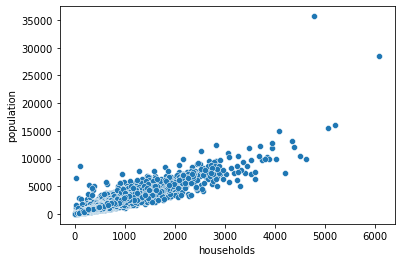

In [53]:
import seaborn as sns
sns.scatterplot(data=df, x="households", y="population")

2. Визуализировать longitude по отношения к
median_house_value, используя линейный график


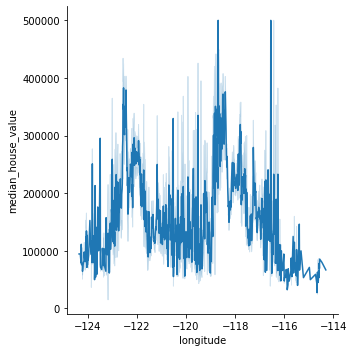

In [54]:
sns.relplot(x="longitude", y="median_house_value", kind="line", data=df)

3. Представить гистограмму по housing_median_age

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

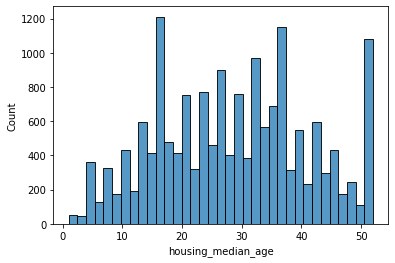

In [55]:
sns.histplot(data=df, x="housing_median_age")

4. Изобразить гистограмму по median_house_value с
оттенком housing_median_age

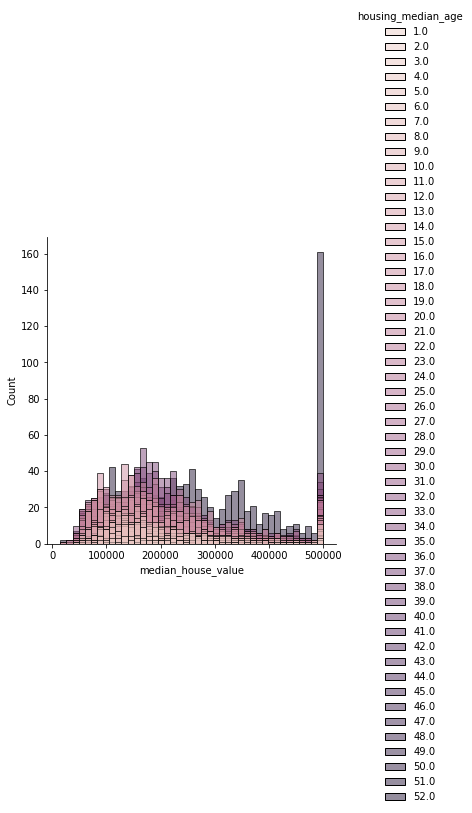

In [57]:
sns.displot(df, x="median_house_value",hue="housing_median_age")

Задача №65. Решение в группах
Написать EDA для датасета про пингвинов
Необходимо:
● Использовать 2-3 точечных графика
● Применить доп измерение в точечных графиках, используя
аргументы hue, size, stile

In [ ]:
pg = sns.load_dataset("penguins")
type(pg)

In [35]:
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:xlabel='body_mass_g', ylabel='bill_length_mm'>

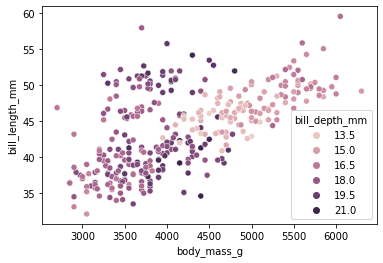

In [43]:
sns.scatterplot(data=pg, x='body_mass_g', y='bill_length_mm', hue='bill_depth_mm')

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

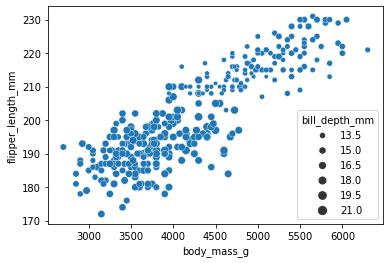

In [44]:
sns.scatterplot(data=pg, x='body_mass_g', y='flipper_length_mm', size='bill_depth_mm')

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

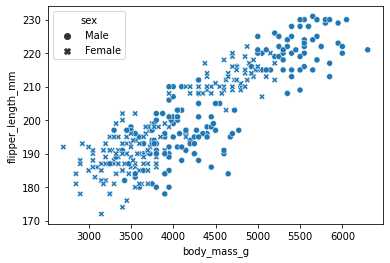

In [47]:
sns.scatterplot(data=pg, x='body_mass_g', y='flipper_length_mm', style='sex')

● Использовать PairGrid с типом графика на ваш выбор

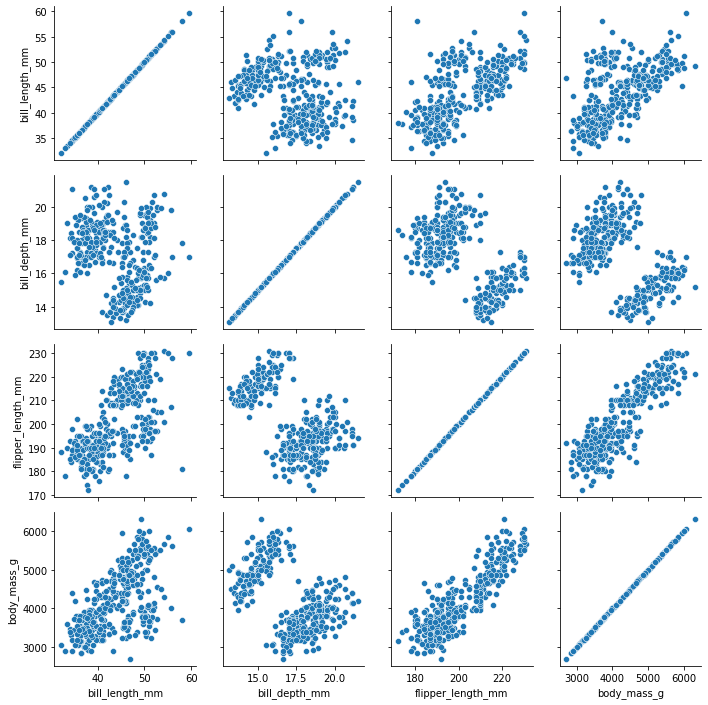

In [59]:
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
'body_mass_g']
g = sns.PairGrid(pg[cols])
g.map(sns.scatterplot)


● Изобразить Heatmap

In [ ]:
sns.heatmap(pg.corr())

<AxesSubplot:>

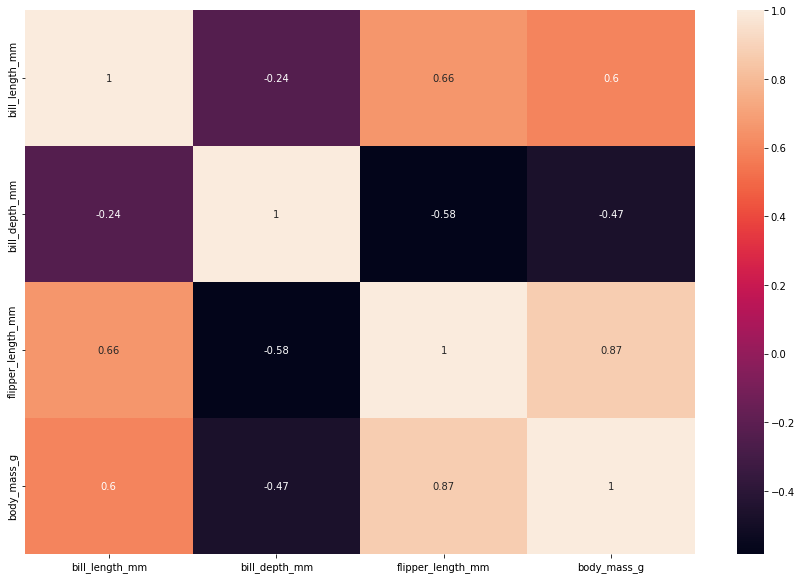

In [94]:
sns.heatmap(pg.corr(), annot=True)

Использовать 2-3 гистограммы

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

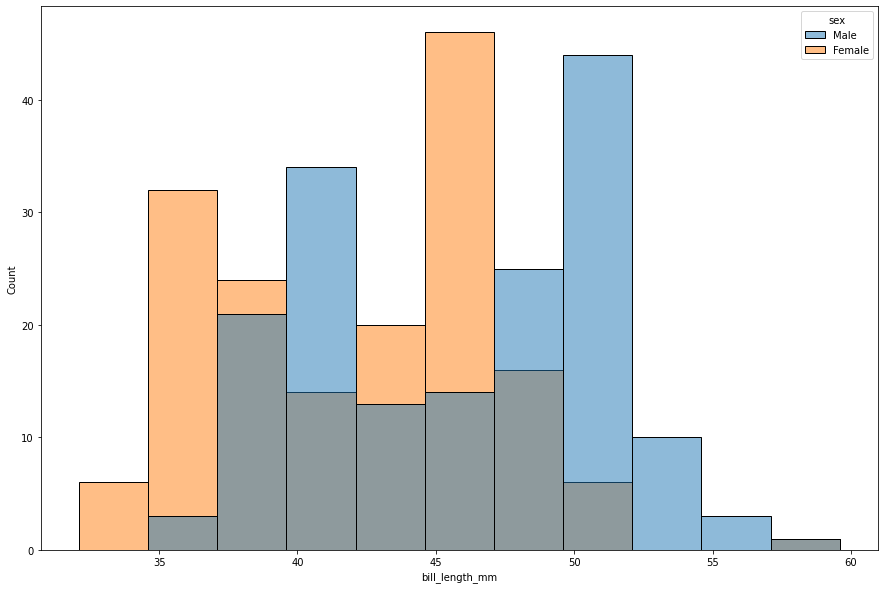

In [116]:
sns.histplot(data=pg, x="bill_length_mm", hue="sex")

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

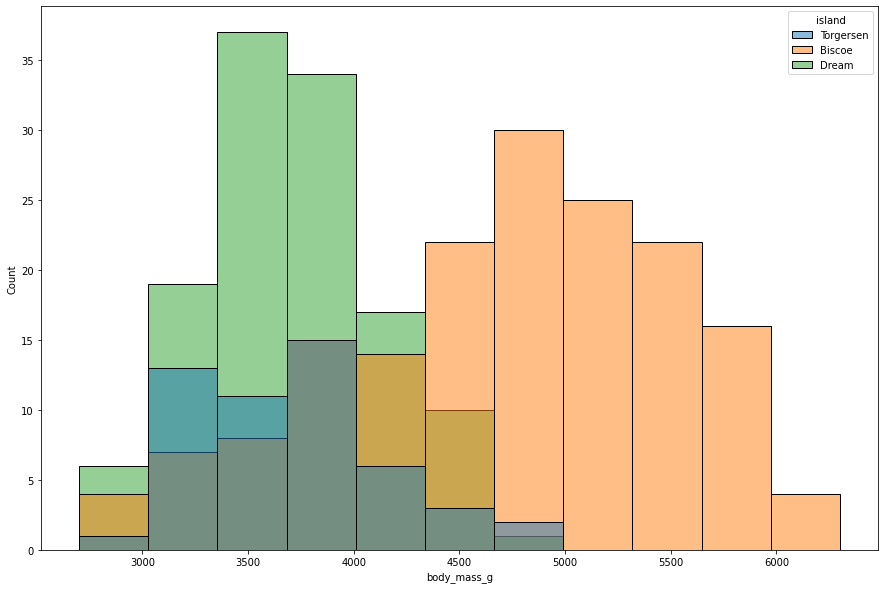

In [113]:
sns.histplot(data=pg, x='body_mass_g', hue="island")

Задача №67. Решение в группах
1. Создать новый столбец в таблице с
пингвинами, который будет отвечать за
показатель длины клюва пингвина.

low - маленький(до 35)
high - длинный(от 42)
middle - средний(от 35 до  42)

In [159]:
pg.head()

,species,size,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,8,bill_stats
0,Adelie,0,Torgersen,39.1,18.7,181.0,3750.0,Male,0,middle
1,Adelie,0,Torgersen,39.5,17.4,186.0,3800.0,Female,0,middle
2,Adelie,0,Torgersen,40.3,18.0,195.0,3250.0,Female,0,middle
3,Adelie,0,Torgersen,NaN,NaN,NaN,NaN,NaN,0,None
4,Adelie,0,Torgersen,36.7,19.3,193.0,3450.0,Female,0,middle


In [127]:
pg.columns

Index([          'species',            'island',    'bill_length_mm',
           'bill_depth_mm', 'flipper_length_mm',       'body_mass_g',
                     'sex',                   8],
      dtype='object')

In [161]:
def bill_stats(value):
    if value < 35:
        return "low"
    elif value >= 42:
        return "high"
    elif 35 <= value < 42:
        return "middle"

 
pg['bill_stats'] = pg['bill_length_mm'].map(bill_stats)
pg.head(20)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_stats
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,middle
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,middle
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,middle
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,None
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,middle
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,middle
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,middle
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,middle
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,low
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,high
